# PCA

torch.Size([200, 200])

In [30]:
from sklearn.decomposition import PCA as SKPCA
# Create data
X = torch.randn(100, 20)  # 100 samples, 20 features

# Initialize and fit PCA
pca = SKPCA(n_components=10)
# extract eigenvectors
pca.fit(X)
eigenvectors = pca.components_
print(eigenvectors[0])
# Transform data
#X_transformed = pca.transform(X)
# Or do both in one step
#X_transformed = pca.fit_transform(X)
# Reconstruct original data
#X_reconstructed = pca.inverse_transform(X_transformed)

[-0.31133211 -0.2856888  -0.06808493 -0.29596857 -0.15046835  0.20102996
 -0.06719138 -0.09995825  0.05689173 -0.12408314  0.31033542  0.38502466
 -0.06498568 -0.23932484 -0.20697676  0.27638125 -0.21401065 -0.07370372
 -0.35993478  0.16420865]


In [32]:
from torch_pca import PCA

# Create like sklearn.decomposition.PCA, e.g.:
pca_model = PCA(n_components=None, svd_solver='full')

# Use like sklearn.decomposition.PCA, e.g.:
new_train_data = pca_model.fit_transform(X)
#new_test_data = pca_model.transform(test_data)
#print(pca_model.explained_variance_ratio_)
pca_model.components_[0]
#[0.756, 0.142, 0.062, ...]

tensor([-0.3113, -0.2857, -0.0681, -0.2960, -0.1505,  0.2010, -0.0672, -0.1000,
         0.0569, -0.1241,  0.3103,  0.3850, -0.0650, -0.2393, -0.2070,  0.2764,
        -0.2140, -0.0737, -0.3599,  0.1642])

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random symmetric matrix with zero diagonal
def generate_symmetric_matrix_zero_diag(n):
    # Generate a random matrix
    A = np.random.rand(n, n)
    A = A.astype(np.float32)
    # Make it symmetric by adding it to its transpose and dividing by 2
    A = (A + A.T) / 2
    # Set diagonal elements to zero
    np.fill_diagonal(A, 0)
    return A


Is the first matrix symmetric? True
Original matrix:
tensor([[0.0000, 0.7968, 0.5786,  ..., 0.5060, 0.4347, 0.5848],
        [0.7968, 0.0000, 0.4412,  ..., 0.6377, 0.2349, 0.2308],
        [0.5786, 0.4412, 0.0000,  ..., 0.5840, 0.3747, 0.0707],
        ...,
        [0.5060, 0.6377, 0.5840,  ..., 0.0000, 0.5918, 0.4421],
        [0.4347, 0.2349, 0.3747,  ..., 0.5918, 0.0000, 0.6950],
        [0.5848, 0.2308, 0.0707,  ..., 0.4421, 0.6950, 0.0000]],
       dtype=torch.float64)
Diagonal values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


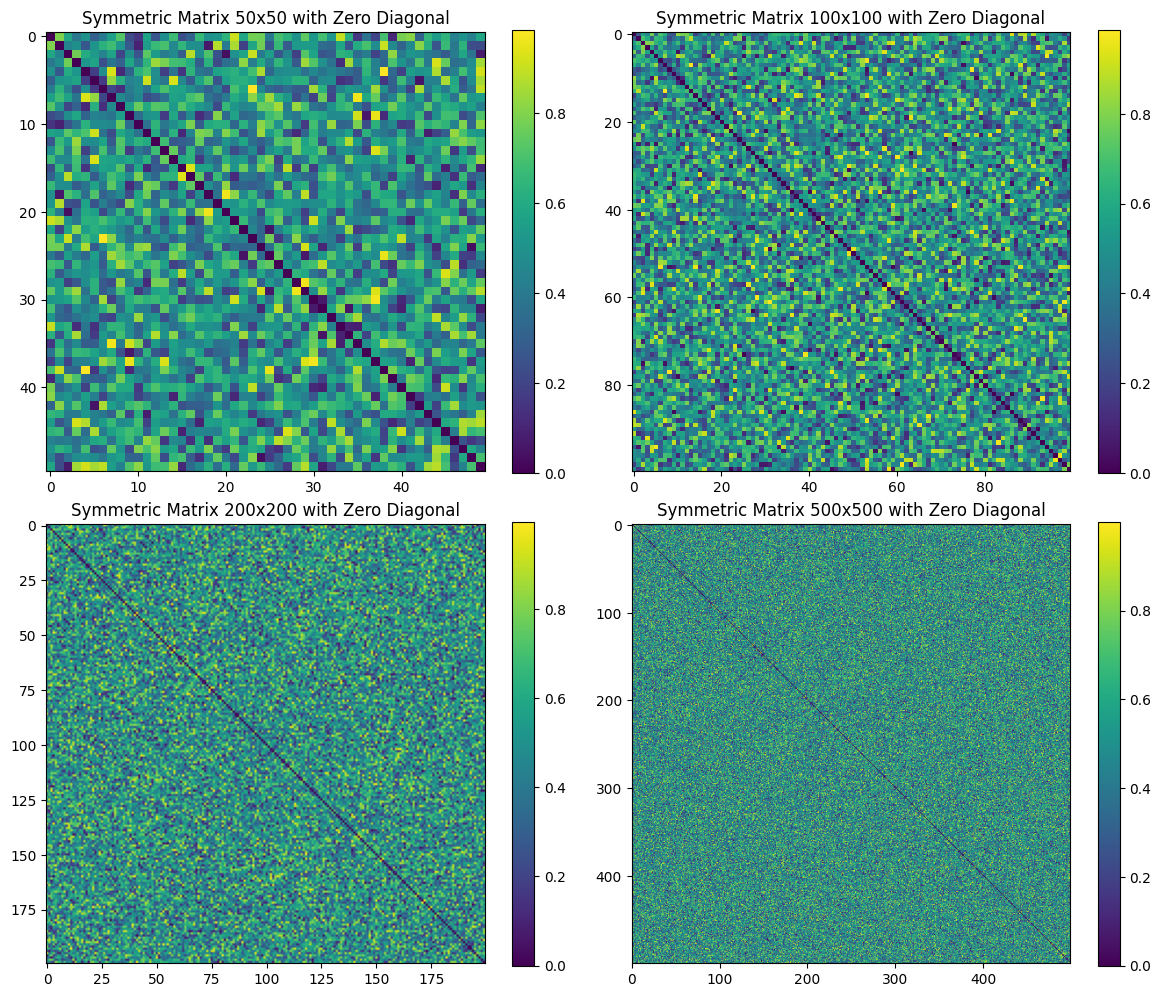

In [57]:

# Plot the matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (size, matrix) in enumerate(zip(sizes, matrices)):
    im = axes[i].imshow(matrix, cmap='viridis')
    axes[i].set_title(f'Symmetric Matrix {size}x{size} with Zero Diagonal')
    fig.colorbar(im, ax=axes[i])

# Verify symmetry for the first matrix
print(f"Is the first matrix symmetric? {np.allclose(matrices[0], matrices[0].T)}")
print("Original matrix:")
print(matrices[0])
print("Diagonal values:")
print(np.diag(matrices[0]))

plt.tight_layout()
plt.show()

In [59]:
import time
import numpy as np
import torch
from sklearn.decomposition import PCA as SKPCA
from torch_pca import PCA

import matplotlib.pyplot as plt


# Create a few symmetric matrices of different sizes
sizes = [50, 100, 200, 500]
matrices = []

# Generate matrices
for size in sizes:
    mat = generate_symmetric_matrix_zero_diag(size)
    matrices.append(mat)
# Convert to PyTorch tensors
matrices = [torch.tensor(m, dtype=torch.float32) for m in matrices]

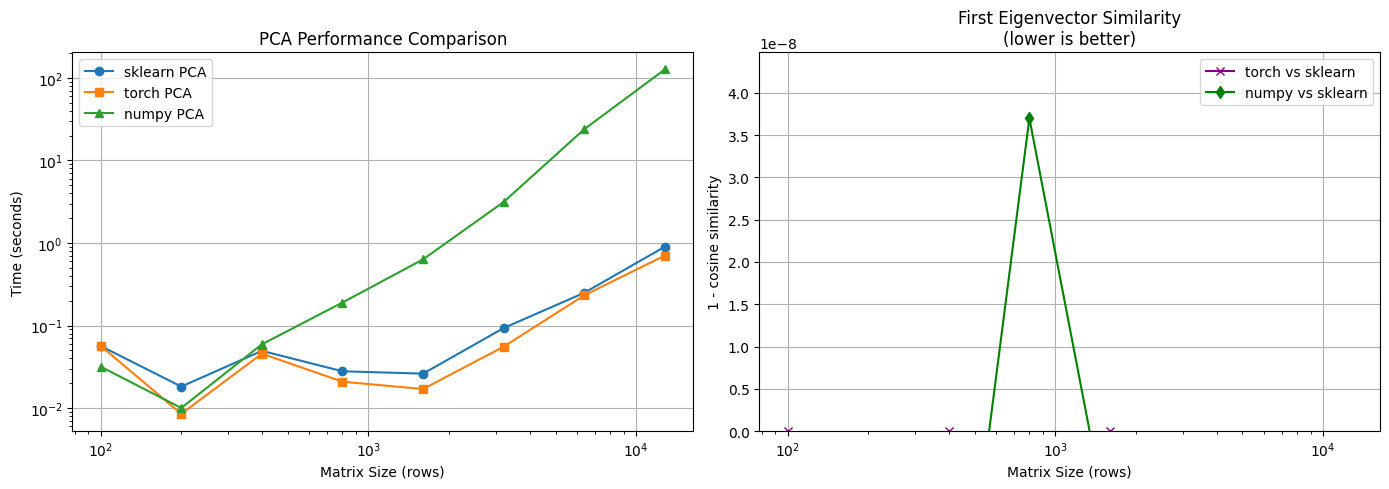

In [3]:
import time
import numpy as np
import torch
from sklearn.decomposition import PCA as SKPCA
from torch_pca import PCA
import matplotlib.pyplot as plt

# Function to perform PCA using NumPy
def numpy_pca(X, n_components=2):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    # Calculate covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    # Return top n_components eigenvectors
    return eigenvectors[:, :n_components].T

# Define matrix sizes to test
sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800]  # Number of rows
features = 20  # Keep feature dimension constant

# Store results
sklearn_times = []
torch_times = []
numpy_times = []
vector_diffs = []  # Store difference between first eigenvectors
numpy_diffs = []   # Store difference between numpy and sklearn eigenvectors

for size in sizes:
    #print(f"Processing size {size}...")
    
    # Create random data
    X_large0 = torch.rand(size, size)
    # Create symmetric matrix by matrix multiplication with its transpose
    X_large = torch.matmul(X_large0, X_large0.T)
    # Ensure the diagonal remains the same (optional)
    X_large.fill_diagonal_(0)
    
    X_np = X_large.numpy()
    
    # Sklearn PCA
    start_time = time.time()
    sk_pca = SKPCA(n_components=2)
    sk_pca.fit(X_np)
    sk_eigenvector = sk_pca.components_[0]
    sklearn_time = time.time() - start_time
    sklearn_times.append(sklearn_time)
    
    # Torch PCA
    start_time = time.time()
    torch_pca = PCA(n_components=2)
    torch_pca.fit_transform(X_large)
    torch_eigenvector = torch_pca.components_[0].numpy()
    torch_time = time.time() - start_time
    torch_times.append(torch_time)
    
    # NumPy PCA
    start_time = time.time()
    numpy_components = numpy_pca(X_np, n_components=2)
    numpy_eigenvector = numpy_components[0]
    numpy_time = time.time() - start_time
    numpy_times.append(numpy_time)
    
    # Calculate difference between sklearn and torch eigenvectors
    cosine_sim = np.abs(np.dot(sk_eigenvector, torch_eigenvector) / 
                      (np.linalg.norm(sk_eigenvector) * np.linalg.norm(torch_eigenvector)))
    vector_diff = 1 - cosine_sim  # 0 means perfectly aligned
    vector_diffs.append(vector_diff)
    
    # Calculate difference between sklearn and numpy eigenvectors
    numpy_sim = np.abs(np.dot(sk_eigenvector, numpy_eigenvector) / 
                     (np.linalg.norm(sk_eigenvector) * np.linalg.norm(numpy_eigenvector)))
    numpy_diff = 1 - numpy_sim
    numpy_diffs.append(numpy_diff)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Time comparison with log scale
ax1.plot(sizes, sklearn_times, 'o-', label='sklearn PCA')
ax1.plot(sizes, torch_times, 's-', label='torch PCA')
ax1.plot(sizes, numpy_times, '^-', label='numpy PCA')
ax1.set_xlabel('Matrix Size (rows)')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('PCA Performance Comparison')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')  # Set log scale for y-axis
ax1.set_xscale('log')  # Set log scale for x-axis

# Vector difference
ax2.plot(sizes, vector_diffs, 'x-', color='purple', label='torch vs sklearn')
ax2.plot(sizes, numpy_diffs, 'd-', color='green', label='numpy vs sklearn')
ax2.set_xlabel('Matrix Size (rows)')
ax2.set_ylabel('1 - cosine similarity')
ax2.set_title('First Eigenvector Similarity\n(lower is better)')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(bottom=0)
ax2.set_xscale('log')  # Set log scale for x-axis

plt.tight_layout()
plt.show()

In [14]:
import time
import numpy as np
import torch
from sklearn.decomposition import PCA as SKPCA
from torch_pca import PCA
import matplotlib.pyplot as plt
import psutil
import tracemalloc
import gc

# Function to get current memory usage
def get_memory_usage():
    """Get current memory usage in MB"""
    process = psutil.Process()
    return process.memory_info().rss / 1024 / 1024  # Convert to MB

# Function to perform PCA using NumPy
def numpy_pca(X, n_components=2):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    # Calculate covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    # Return top n_components eigenvectors
    return eigenvectors[:, :n_components].T

# Define matrix sizes to test
sizes = [800, 1600, 3200, 6400, 12800, 16000, 20000]  # Reduced for memory testing
features = 20  # Keep feature dimension constant

# Store results
sklearn_times = []
torch_times = []
numpy_times = []
sklearn_memory = []
torch_memory = []
numpy_memory = []
sklearn_peak_memory = []
torch_peak_memory = []
numpy_peak_memory = []
vector_diffs = []
numpy_diffs = []

for size in sizes:
    print(f"Processing size {size}...")
    
    # Force garbage collection before each test
    gc.collect()
    
    # Create random data
    X_large0 = torch.rand(size, size)
    X_large = torch.matmul(X_large0, X_large0.T)
    X_large.fill_diagonal_(0)
    X_np = X_large.numpy()
    
    baseline_memory = get_memory_usage()
    
    # === Sklearn PCA with memory tracking ===
    tracemalloc.start()
    start_memory = get_memory_usage()
    start_time = time.time()
    
    sk_pca = SKPCA(n_components=2)
    sk_pca.fit(X_np)
    sk_eigenvector = sk_pca.components_[0]
    
    sklearn_time = time.time() - start_time
    end_memory = get_memory_usage()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    sklearn_times.append(sklearn_time)
    sklearn_memory.append(end_memory - start_memory)
    sklearn_peak_memory.append(peak / 1024 / 1024)  # Convert to MB
    
    # Clean up
    del sk_pca
    gc.collect()
    
    # === Torch PCA with memory tracking ===
    tracemalloc.start()
    start_memory = get_memory_usage()
    start_time = time.time()
    
    torch_pca = PCA(n_components=2)
    torch_pca.fit_transform(X_large)
    torch_eigenvector = torch_pca.components_[0].numpy()
    
    torch_time = time.time() - start_time
    end_memory = get_memory_usage()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    torch_times.append(torch_time)
    torch_memory.append(end_memory - start_memory)
    torch_peak_memory.append(peak / 1024 / 1024)  # Convert to MB
    
    # Clean up
    del torch_pca
    gc.collect()
    
    # === NumPy PCA with memory tracking ===
    tracemalloc.start()
    start_memory = get_memory_usage()
    start_time = time.time()
    
    numpy_components = numpy_pca(X_np, n_components=2)
    numpy_eigenvector = numpy_components[0]
    
    numpy_time = time.time() - start_time
    end_memory = get_memory_usage()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    numpy_times.append(numpy_time)
    numpy_memory.append(end_memory - start_memory)
    numpy_peak_memory.append(peak / 1024 / 1024)  # Convert to MB
    
    # Clean up
    del numpy_components
    gc.collect()
    
    # Calculate eigenvector similarities (same as before)
    cosine_sim = np.abs(np.dot(sk_eigenvector, torch_eigenvector) / 
                      (np.linalg.norm(sk_eigenvector) * np.linalg.norm(torch_eigenvector)))
    vector_diff = 1 - cosine_sim
    vector_diffs.append(vector_diff)
    
    numpy_sim = np.abs(np.dot(sk_eigenvector, numpy_eigenvector) / 
                     (np.linalg.norm(sk_eigenvector) * np.linalg.norm(numpy_eigenvector)))
    numpy_diff = 1 - numpy_sim
    numpy_diffs.append(numpy_diff)

Processing size 800...
Processing size 1600...
Processing size 3200...
Processing size 6400...
Processing size 12800...
Processing size 16000...
Processing size 20000...


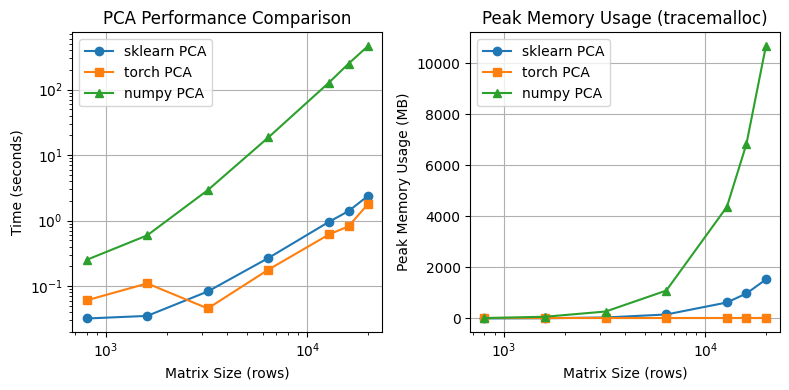


Memory Usage Summary:
Size		Sklearn		Torch		NumPy
    		RSS(MB)	Peak(MB)	RSS(MB)	Peak(MB)	RSS(MB)	Peak(MB)
800		-10.0	2.6		7.3	0.0		-1948.1	17.1
1600		0.4	10.1		-259.3	0.0		14.7	68.4
3200		0.5	39.7		80.2	0.0		58.6	273.5
6400		2.3	157.5		158.4	0.0		235.0	1093.9
12800		2.7	627.5		938.3	0.0		930.8	4375.2
16000		5.9	979.7		719.6	0.0		-819.3	6836.2
20000		9.5	1529.8		2567.9	0.0		-5282.3	10681.5


In [15]:
# Plot results with memory information
fig, ((ax1), (ax3)) = plt.subplots(1, 2, figsize=(8, 4))

# Time comparison
ax1.plot(sizes, sklearn_times, 'o-', label='sklearn PCA')
ax1.plot(sizes, torch_times, 's-', label='torch PCA')
ax1.plot(sizes, numpy_times, '^-', label='numpy PCA')
ax1.set_xlabel('Matrix Size (rows)')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('PCA Performance Comparison')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')
ax1.set_xscale('log')

# Peak memory usage (tracemalloc)
ax3.plot(sizes, sklearn_peak_memory, 'o-', label='sklearn PCA')
ax3.plot(sizes, torch_peak_memory, 's-', label='torch PCA')
ax3.plot(sizes, numpy_peak_memory, '^-', label='numpy PCA')
ax3.set_xlabel('Matrix Size (rows)')
ax3.set_ylabel('Peak Memory Usage (MB)')
ax3.set_title('Peak Memory Usage (tracemalloc)')
ax3.legend()
ax3.grid(True)
ax3.set_xscale('log')

plt.tight_layout()
plt.show()

# Print memory statistics
print("\nMemory Usage Summary:")
print("Size\t\tSklearn\t\tTorch\t\tNumPy")
print("    \t\tRSS(MB)\tPeak(MB)\tRSS(MB)\tPeak(MB)\tRSS(MB)\tPeak(MB)")
for i, size in enumerate(sizes):
    print(f"{size}\t\t{sklearn_memory[i]:.1f}\t{sklearn_peak_memory[i]:.1f}\t\t"
          f"{torch_memory[i]:.1f}\t{torch_peak_memory[i]:.1f}\t\t"
          f"{numpy_memory[i]:.1f}\t{numpy_peak_memory[i]:.1f}")

In [25]:
import time
import numpy as np
import torch
from sklearn.decomposition import PCA as SKPCA
from torch_pca import PCA

import matplotlib.pyplot as plt

# Define matrix sizes to test
sizes = [6400, 12800, 15000, 20000, 25600, 32000, 45000, 64000]  # Number of rows
# make a list of sizes from 100 to 25600, increasing by factor 2
#sizes = [100 * 1.2**i for i in range(8)]
features = 20  # Keep feature dimension constant

# Store results
torch_times = []

for size in sizes:
    #print(f"Processing size {size}...")
    
    # Create random data
    # Create random matrix with desired dimensions
    X_large0 = torch.rand(size, size)
    # Create symmetric matrix by matrix multiplication with its transpose
    X_large = torch.matmul(X_large0, X_large0.T)
    # Ensure the diagonal remains the same (optional)
    # If you want zero diagonal: 
    X_large.fill_diagonal_(0)
            
    # Torch PCA
    start_time = time.time()
    torch_pca = PCA(n_components=2)
    torch_pca.fit_transform(X_large)
    torch_eigenvector = torch_pca.components_[0].numpy()
    torch_time = time.time() - start_time
    torch_times.append(torch_time)

KeyboardInterrupt: 

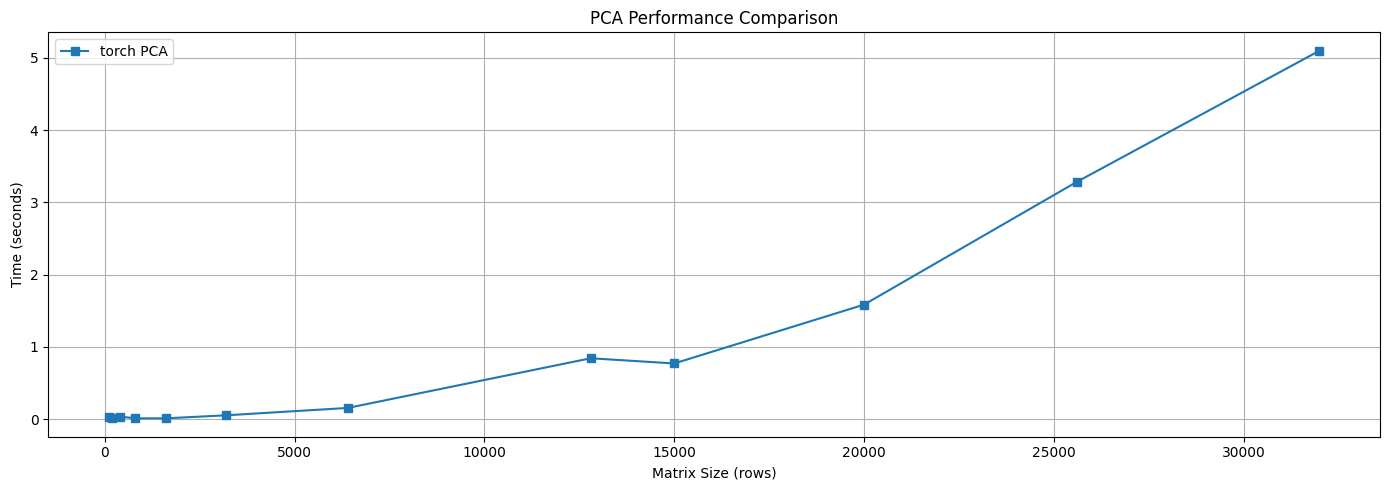

In [ ]:

# Plot results
fig, (ax1) = plt.subplots(1, 1, figsize=(14, 5))

# Time comparison
ax1.plot(sizes, torch_times, 's-', label='torch PCA')
ax1.set_xlabel('Matrix Size (rows)')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('PCA Performance Comparison')
ax1.legend()
ax1.grid(True)

plt.tight_layout()
plt.show()

In [23]:
import torch
import numpy as np
from qrpca.decomposition import qrpca
from qrpca.decomposition import svdpca

# Generate the random data
demo_data = torch.rand(60000,2000)
n_com = 1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# qrpca
pca = qrpca(n_component_ratio=n_com,device=device) # The percentage of information retained.
# pca = qrpca(n_component_ratio=10,device=device) # n principal components are reserved.
demo_qrpca = pca.fit_transform(demo_data)
print(demo_qrpca)


cpu


c:\Users\endofs\OneDrive - Miljødirektoratet\git\egowork\matrise_arbeid\.venv\Lib\site-packages\qrpca\decomposition.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype=torch.float32).to(self.device)


[[ 0.4957189 ]
 [ 0.3242166 ]
 [-0.16917144]
 ...
 [ 0.34304357]
 [ 0.48192286]
 [ 0.34438416]]


# Segmentation

In [ ]:
from skimage import io, color, segmentation
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries
#from skimage.future import graph
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Load the image
img_path = r"c:\Users\endofs\OneDrive\Pictures\_MG_6491.jpg"
img = io.imread(img_path)
img_rgb = img_as_float(img)

In [4]:
img_rgb

array([[[0.82745098, 0.81176471, 0.87058824],
        [0.87058824, 0.8627451 , 0.91372549],
        [0.87843137, 0.87058824, 0.91372549],
        ...,
        [0.2627451 , 0.35686275, 0.        ],
        [0.30980392, 0.38431373, 0.06666667],
        [0.36470588, 0.45882353, 0.11372549]],

       [[0.82745098, 0.81176471, 0.87058824],
        [0.86666667, 0.85882353, 0.90980392],
        [0.88235294, 0.8745098 , 0.91764706],
        ...,
        [0.28235294, 0.37647059, 0.00784314],
        [0.32156863, 0.4       , 0.06666667],
        [0.4       , 0.49803922, 0.1372549 ]],

       [[0.83137255, 0.81568627, 0.8745098 ],
        [0.8627451 , 0.85490196, 0.90588235],
        [0.87843137, 0.87058824, 0.91372549],
        ...,
        [0.2627451 , 0.35294118, 0.00784314],
        [0.31764706, 0.39215686, 0.0745098 ],
        [0.39607843, 0.49803922, 0.14117647]],

       ...,

       [[0.25882353, 0.42352941, 0.03921569],
        [0.35686275, 0.59607843, 0.09019608],
        [0.16078431, 0

In [5]:
# Apply SLIC segmentation
segments = slic(img_rgb, n_segments=50, compactness=5, start_label=1)

In [6]:
import rasterio
from rasterio.features import shapes
from shapely.geometry import shape, Polygon as ShapelyPolygon, MultiPolygon
import geopandas as gpd
from rasterio.transform import from_bounds
import numpy as np

In [ ]:
def segments_to_polygons(segments, img_shape, transform=None):
    """
    Convert segmented image to spatial polygons via geographic raster
    
    Parameters:
    - segments: segmentation labels
    - img_shape: shape of the original image (height, width)
    - transform: rasterio transform object, if None creates a default one
    
    Returns:
    - geopandas GeoDataFrame with polygon geometries
    """
    if transform is None:
        # Create a default transform (0,0 to img_shape with pixel resolution of 1)
        transform = from_bounds(0, 0, img_shape[1], img_shape[0], 
                               img_shape[1], img_shape[0])
    
    polygons = []
    unique_segments = np.unique(segments)
    
    for segment_id in unique_segments:
        # Create binary mask for current segment
        mask = (segments == segment_id).astype(np.uint8)
        
        # Use rasterio.features.shapes to extract polygons
        polygon_generator = shapes(mask, mask=mask, transform=transform)
        
        # Collect all polygons for this segment
        segment_polygons = []
        total_area = 0
        
        for geom, value in polygon_generator:
            if value == 1:  # Only process areas where mask is 1
                poly = shape(geom)
                segment_polygons.append(poly)
                total_area += poly.area
        
        # Create multipolygon if multiple polygons, otherwise single polygon
        if len(segment_polygons) > 1:
            # Create MultiPolygon
            geometry = MultiPolygon(segment_polygons)
        elif len(segment_polygons) == 1:
            # Single polygon
            geometry = segment_polygons[0]
        else:
            continue  # Skip if no valid polygons
        
        # Get bounding box
        bounds = geometry.bounds
        
        polygons.append({
            'segment_id': int(segment_id),
            'geometry': geometry,
            'area': total_area,
            'pixel_count': np.sum(mask),
            'bounds': bounds,
            'minx': bounds[0],
            'miny': bounds[1], 
            'maxx': bounds[2],
            'maxy': bounds[3],
            'polygon_type': 'MultiPolygon' if isinstance(geometry, MultiPolygon) else 'Polygon'
        })
    
    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(polygons)
    
    return gdf

# Convert segments to spatial polygons
original_polygons_gdf = segments_to_polygons(segments, img_rgb.shape[:2])

print(f"Original polygons: {len(original_polygons_gdf)}")
print(f"Polygon types: {original_polygons_gdf['polygon_type'].value_counts().to_dict()}")
print(f"Total area: {original_polygons_gdf['area'].sum():.2f}")

In [ ]:
def plot_spatial_polygons(image, gdf, title, ax):
    """
    Plot spatial polygons on the image
    """
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')
    
    # Plot polygons from GeoDataFrame
    gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1.5, alpha=0.8)
    
    # Add bounding box visualization for a few polygons
    for idx, row in gdf.head(5).iterrows():  # Show first 5 bounding boxes
        bounds = row['bounds']
        bbox = plt.Rectangle((bounds[0], bounds[1]), 
                           bounds[2] - bounds[0], 
                           bounds[3] - bounds[1],
                           fill=False, edgecolor='blue', linewidth=1, alpha=0.5)
        ax.add_patch(bbox)

# Create visualization with spatial polygons
fig, ax = plt.subplots(1, 2, figsize=(16, 12))

# Original image
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')



# Original segments as spatial polygons
plot_spatial_polygons(img_rgb, original_polygons_gdf, 
                     f'Spatial Polygons ({len(original_polygons_gdf)} polygons)', ax[1,0])

# Statistics
stats_text = f"""Polygon Statistics:
Total polygons: {len(original_polygons_gdf)}
Polygons: {original_polygons_gdf['polygon_type'].value_counts().get('Polygon', 0)}
MultiPolygons: {original_polygons_gdf['polygon_type'].value_counts().get('MultiPolygon', 0)}
Avg area: {original_polygons_gdf['area'].mean():.2f}
Total area: {original_polygons_gdf['area'].sum():.2f}"""

ax[1,1].text(0.1, 0.5, stats_text, transform=ax[1,1].transAxes, 
            fontsize=12, verticalalignment='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
ax[1,1].set_title('Polygon Statistics')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Export spatial data
def export_polygons_to_file(gdf, filename):
    """
    Export polygons to various formats
    """
    # Save as shapefile
    gdf.to_file(f"{filename}.shp")
    
    # Save as GeoJSON
    gdf.to_file(f"{filename}.geojson", driver='GeoJSON')
    
    # Save as GeoPackage
    gdf.to_file(f"{filename}.gpkg", driver='GPKG')
    
    print(f"Exported to: {filename}.shp, {filename}.geojson, {filename}.gpkg")

# Optional: Export the polygons
# export_polygons_to_file(original_polygons_gdf, "slic_segments")

# Display detailed information about polygons
print("\nDetailed Polygon Information:")
print(original_polygons_gdf[['segment_id', 'area', 'pixel_count', 'polygon_type', 'minx', 'miny', 'maxx', 'maxy']].head(10))

In [15]:
from skimage import io, color, segmentation, measure
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [17]:
# Convert segments to polygons
def segments_to_polygons(segments):
    """
    Convert segmented image to polygon boundaries
    
    Parameters:
    - segments: segmentation labels
    
    Returns:
    - polygons: list of polygon coordinates for each segment
    """
    polygons = []
    unique_segments = np.unique(segments)
    
    for segment_id in unique_segments:
        # Create binary mask for current segment
        mask = (segments == segment_id).astype(np.uint8)
        
        # Find contours of the segment
        contours = measure.find_contours(mask, 0.5)
        
        # Convert contours to polygons (take the largest contour if multiple)
        if contours:
            # Take the longest contour (main boundary)
            main_contour = max(contours, key=len)
            
            # Convert to xy coordinates (flip row,col to x,y)
            polygon_coords = np.column_stack([main_contour[:, 1], main_contour[:, 0]])
            
            polygons.append({
                'id': segment_id,
                'coordinates': polygon_coords,
                'area': np.sum(mask)
            })
    
    return polygons

# Convert both original and merged segments to polygons
original_polygons = segments_to_polygons(segments)
#merged_polygons = segments_to_polygons(segments)

print(f"Original polygons: {len(original_polygons)}")
#print(f"Merged polygons: {len(merged_polygons)}")

Original polygons: 12


NameError: name 'merged_segments' is not defined

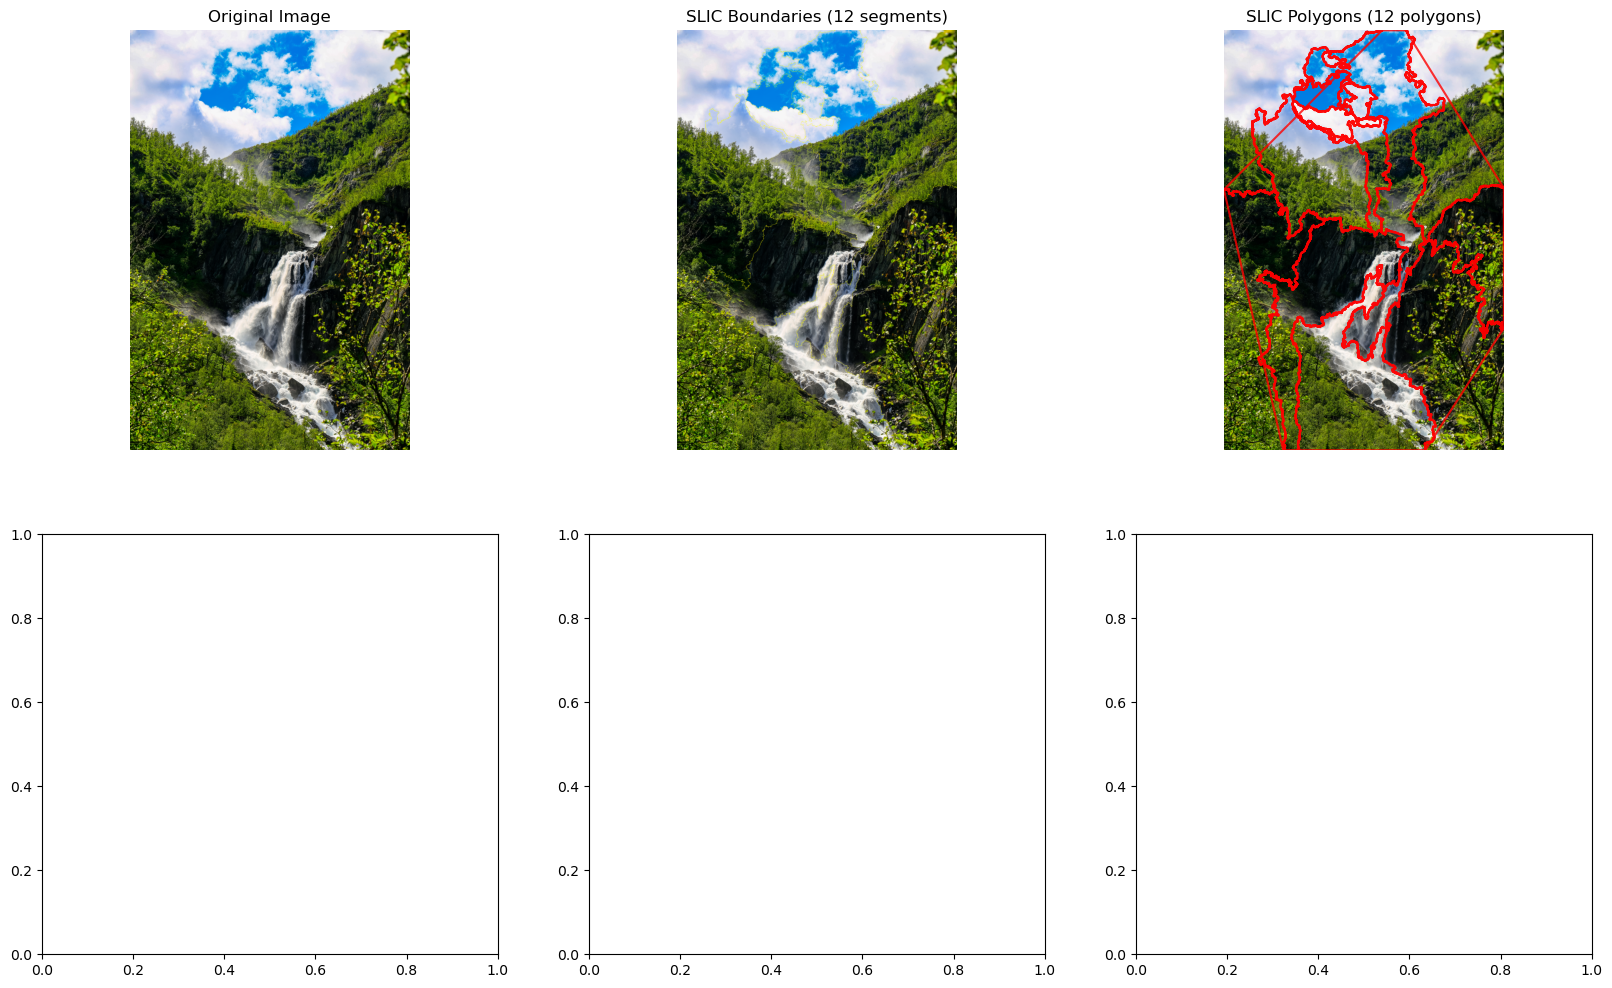

In [ ]:
# Plot segments as polygons
def plot_polygons(image, polygons, title, ax):
    """
    Plot polygons on the image
    """
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')
    
    # Create polygon patches
    patches = []
    colors = []
    
    for i, poly_data in enumerate(polygons):
        coords = poly_data['coordinates']
        if len(coords) > 2:  # Valid polygon needs at least 3 points
            polygon = Polygon(coords, closed=True, fill=False, linewidth=1)
            patches.append(polygon)
            colors.append(plt.cm.tab20(i % 20))  # Cycle through 20 colors
    
    # Add polygons to plot
    collection = PatchCollection(patches, facecolors='none', edgecolors='red', linewidths=1.5, alpha=0.8)
    ax.add_collection(collection)

# Display results with polygons
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# Original image
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

# Original SLIC with boundaries
boundaries_original = segmentation.mark_boundaries(img_rgb, segments)
ax[0,1].imshow(boundaries_original)
ax[0,1].set_title(f'SLIC Boundaries ({len(np.unique(segments))} segments)')
ax[0,1].axis('off')

# Original segments as polygons
plot_polygons(img_rgb, original_polygons, f'SLIC Polygons ({len(original_polygons)} polygons)', ax[0,2])

# Merged segmentation with boundaries
#boundaries_merged = segmentation.mark_boundaries(img_rgb, merged_segments)
#ax[1,0].imshow(boundaries_merged)
#ax[1,0].set_title(f'Merged Boundaries ({len(np.unique(merged_segments))} segments)')
#ax[1,0].axis('off')

# Merged segments as polygons
#plot_polygons(img_rgb, merged_polygons, f'Merged Polygons ({len(merged_polygons)} polygons)', ax[1,1])

# Comparison chart
segments_comparison = [len(original_polygons), len(merged_polygons)]
labels = ['Original SLIC', 'After Merging']
ax[1,2].bar(labels, segments_comparison, color=['blue', 'orange'])
ax[1,2].set_ylabel('Number of Polygons')
ax[1,2].set_title('Polygon Count Comparison')

# Add value labels on bars
for i, v in enumerate(segments_comparison):
    ax[1,2].text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:


# Create Region Adjacency Graph (RAG) and merge similar adjacent segments
def merge_similar_segments(image, segments, threshold=0.08):
    """
    Merge adjacent segments that are similar in color
    
    Parameters:
    - image: original RGB image
    - segments: segmentation labels
    - threshold: similarity threshold (lower = more strict)
    """
    # Create RAG based on mean color
    rag = graph.rag_mean_color(image, segments, mode='similarity')
    
    # Merge segments based on threshold
    merged_segments = graph.merge_hierarchical(
        segments, rag, thresh=threshold, rag_copy=False,
        in_place_merge=True, merge_func=graph.merge_mean_color,
        weight_func=graph.rag_mean_color
    )
    
    return merged_segments

# Merge similar adjacent segments
merged_segments = merge_similar_segments(img_rgb, segments, threshold=0.08)

print(f"Original segments: {len(np.unique(segments))}")
print(f"Merged segments: {len(np.unique(merged_segments))}")

NameError: name 'graph' is not defined

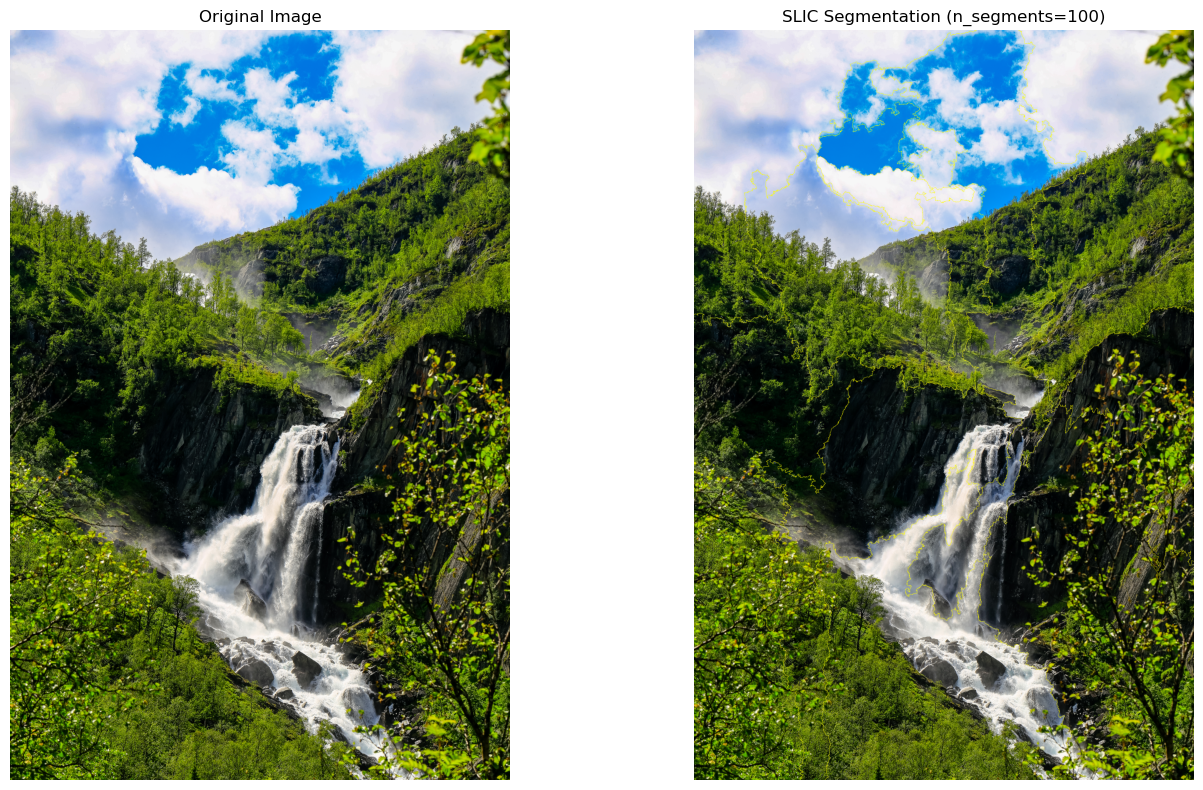

In [ ]:
# Display the results
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Original image
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

# Original SLIC segmentation
boundaries_original = segmentation.mark_boundaries(img_rgb, segments)
ax[0,1].imshow(boundaries_original)
ax[0,1].set_title(f'SLIC Segmentation ({len(np.unique(segments))} segments)')
ax[0,1].axis('off')

# Merged segmentation
boundaries_merged = segmentation.mark_boundaries(img_rgb, merged_segments)
ax[1,0].imshow(boundaries_merged)
ax[1,0].set_title(f'Merged Segmentation ({len(np.unique(merged_segments))} segments)')
ax[1,0].axis('off')

# Comparison of segment counts
segments_comparison = [len(np.unique(segments)), len(np.unique(merged_segments))]
labels = ['Original SLIC', 'After Merging']
ax[1,1].bar(labels, segments_comparison, color=['blue', 'orange'])
ax[1,1].set_ylabel('Number of Segments')
ax[1,1].set_title('Segment Count Comparison')

# Add value labels on bars
for i, v in enumerate(segments_comparison):
    ax[1,1].text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Kriging

## pykrige

In [5]:
import numpy as np
from pykrige.ok import OrdinaryKriging

# Sample data (x, y, z)
x = np.array([0.1, 0.5, 0.8, 1.2, 1.5])
y = np.array([0.2, 0.6, 0.9, 1.3, 1.6])
z = np.array([10.0, 15.0, 12.0, 18.0, 14.0])

# Define the grid for interpolation
grid_x = np.linspace(0, 2, 50)
grid_y = np.linspace(0, 2, 50)

# Create an OrdinaryKriging object with a spherical variogram model
OK = OrdinaryKriging(
    x, y, z,
    variogram_model='spherical',
    verbose=False,
    enable_plotting=False
)

# Execute kriging on the grid
z_interpolated, ss_interpolated = OK.execute("grid", grid_x, grid_y)

# z_interpolated contains the predicted values on the grid
# ss_interpolated contains the kriging variance (standard deviation squared)

## geostatspy

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.77


In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

In [3]:
fraction_data = 0.2                                           # extract a fraction of data for demonstration / faster runs, set to 1.0 for homework

df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # load the data from Dr. Pyrcz's GitHub repository

if fraction_data < 1.0:
    df = df.sample(frac = fraction_data,replace = False,random_state = 73073) # random sample from the dataset
df = df.reset_index()                                         # reorder the data index
df = df.iloc[:,2:7]                                           # remove the unneeded features, columns

df['LogPerm'] = np.log(df['Perm'].values)                     # apply the log transform to remove skew from permeability

df.head()                                                     # preview the DataFrame

,X,Y,Facies,Porosity,Perm,LogPerm
0,280.0,409.0,1.0,0.136716,17.126888,2.840650
1,230.0,749.0,1.0,0.204587,1665.384124,7.417811
2,300.0,500.0,1.0,0.159891,105.797436,4.661526
3,620.0,389.0,0.0,0.100296,7.578784,2.025353
4,370.0,689.0,1.0,0.142434,218.419949,5.386420


In [4]:
df.describe().transpose()                                     # summary table of all facies combined DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
X,74.0,471.891892,282.603724,0.000000,232.500000,405.000000,765.000000,990.000000
Y,74.0,489.932432,291.512933,9.000000,224.000000,484.500000,729.000000,999.000000
Facies,74.0,0.594595,0.494322,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,74.0,0.125834,0.031093,0.062169,0.102895,0.126264,0.148840,0.204587
Perm,74.0,73.040451,214.164084,0.300430,2.081215,10.385010,50.841029,1665.384124
LogPerm,74.0,2.358329,2.086617,-1.202542,0.731083,2.339396,3.928694,7.417811


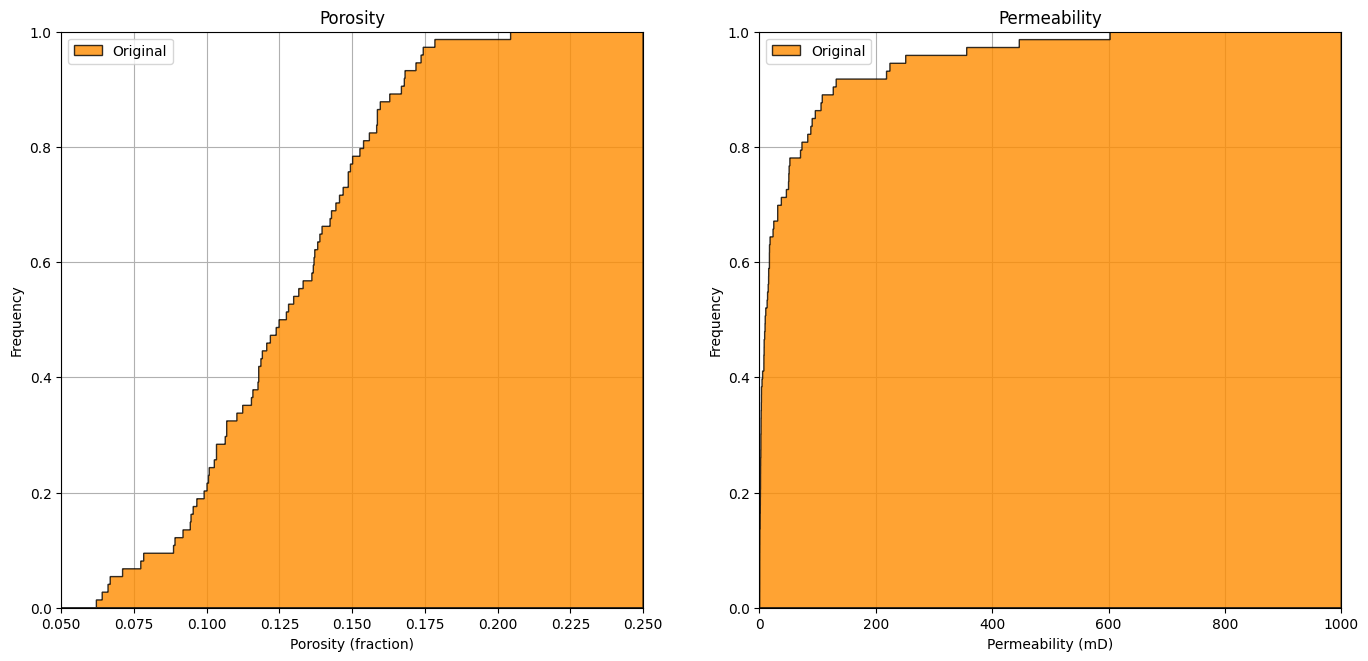

In [5]:
plt.subplot(121)                                              # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='darkorange',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)                                               # plot nscore transformed sand and shale histograms
plt.hist(df['Perm'], facecolor='darkorange',bins=np.linspace(0.0,1000.0,100000),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.0,1000.0]); plt.ylim([0,1.0])
plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [6]:
xmin = 0.0; xmax = 1000.0                                     # range of x values
ymin = 0.0; ymax = 1000.0                                     # range of y values

xsiz = 10; ysiz = 10                                          # cell size
nx = 100; ny = 100                                            # number of cells
xmn = 5; ymn = 5                                              # grid origin, location center of lower left cell

pormin = 0.05; pormax = 0.22                                  # set feature min and max for colorbars
permmin = 0.0; permmax = 700.0

In [8]:
%%capture --no-display                                                                

por_vrange_maj = 250; por_vrange_min = 100                    # variogram ranges
por_vazi = 150.0                                              # variogram major direction
por_vrel_nugget = 0.0                                         # variogram nugget effect

por_skmean = np.average(df['Porosity'].values)                # assume global mean is the mean of the sample
por_sill = np.var(df['Porosity'].values)                      # assume sill is variance of the sample

por_vario = GSLIB.make_variogram(nug=por_vrel_nugget*por_sill,nst=1,it1=1,cc1=(1.0-por_vrel_nugget)*por_sill,
         azi1=por_vazi,hmaj1=por_vrange_maj,hmin1=por_vrange_min) # porosity variogram

ktype = 0                                                     # kriging type, 0 - simple, 1 - ordinary
radius = 600                                                  # search radius for neighbouring data
nxdis = 1; nydis = 1                                          # number of grid discretizations for block kriging
ndmin = 0; ndmax = 10                                         # minimum and maximum data for an estimate

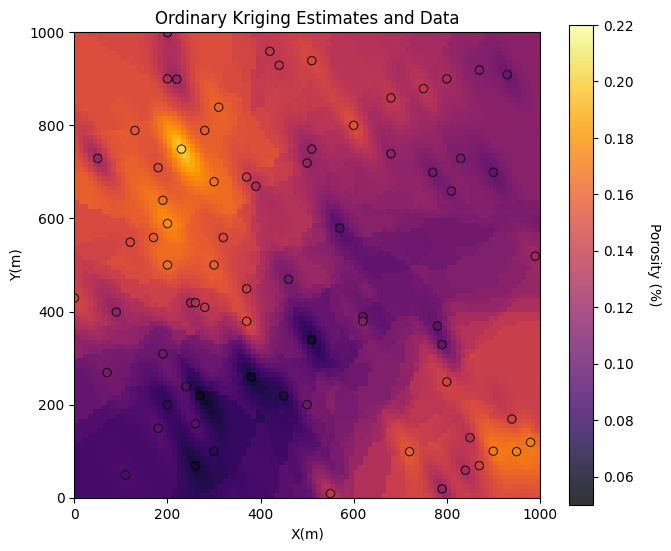

In [10]:
%%capture --no-display     

por_vrange_maj2 = 150; por_vrange_min2 = 50                   # variogram ranges
por_vazi2 = 150.0                                             # variogram major direction
por_vrel_nugget2 = 0.0                                        # variogram nugget effect

por_vario2 = GSLIB.make_variogram(nug=por_vrel_nugget2*por_sill,nst=1,it1=1,cc1=(1.0-por_vrel_nugget2)*por_sill,
         azi1=por_vazi2,hmaj1=por_vrange_maj2,hmin1=por_vrange_min2) # porosity variogram
ktype = 1                                                     # ordinary kriging
por_OK_kmap, por_OK_vmap = geostats.kb2d(df,'X','Y','Porosity',pormin,pormax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,por_skmean,por_vario2)

plt.subplot(122)
GSLIB.locpix_st(por_OK_kmap,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Ordinary Kriging Estimates and Data','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

# Geonorge

In [16]:
import geopandas as gpd

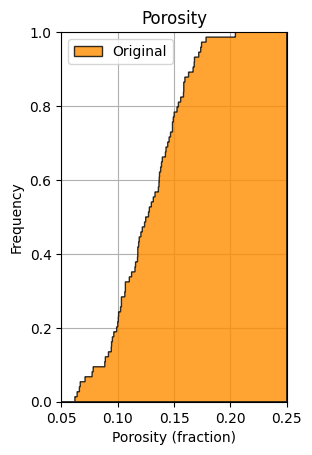

In [11]:
plt.subplot(121)                                              # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='darkorange',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

## Focal statistics

In [ ]:
# g:\temp\endre\Fjell\3_output\dtm_focal_sirkel.tif
